Homework 4:

Write a short (2 page) paper that introduces, solves, and discusses the results from these problems below.

Start from the 1D and 2D Ising model programs we discussed in class

https://colab.research.google.com/drive/1xUB48UpB4Z87yPl2hJ8-8p4wBsH2wKcN?usp=sharing 

https://colab.research.google.com/drive/1eNzGeLRa8N3uPA-N8Sd0rNSnNZLITNQI?usp=sharing 

 - Do as much of 17.4.2 "Equilibration, Thermodynamic Properties (Assessment)" as you can

https://docs.google.com/document/d/1nn-2GkRX4fjEr5y_usLedcZbWkXo9FufTLlJKmo9WK8/edit?tab=t.iw19628hmo7s

In [1]:
from vpython import *
import numpy as np
import random
import math

# -----------------------------------
# PARAMETERS
# -----------------------------------
N = 30
steps = 300

# -----------------------------------
# ENERGY FUNCTION
# -----------------------------------
def calcEnergy(config):
    energy = 0
    for i in range(N):
        S = config[0, i]
        nb = config[0, (i + 1) % N] + config[0, (i - 1) % N]
        energy += -nb * S
    return energy / 2.0

# -----------------------------------
# RUN ONE SIMULATION WITH VPYTHON + HISTORY
# -----------------------------------
def run_simulation_with_visuals(T, y_offset, color_label):
    beta = 1.0 / T
    config = 2 * np.random.randint(1, size=(1, N)) - 1

    # Create spin arrows
    spin_arrows = []
    for i in range(N):
        arrow_obj = arrow(pos=vector(i - N / 2, y_offset, 0),
                          axis=vector(0, config[0, i], 0),
                          color=color.yellow if config[0, i] == 1 else color.white,
                          shaftwidth=0.3)
        spin_arrows.append(arrow_obj)

    # Graph
    graph(title=f"Energy Over Time (T = {T})", xtitle="Step", ytitle="Energy", fast=False, height=200, width=500)
    energy_curve = gcurve(color=color_label)

    # Track config + energy history
    config_history = []
    energy_history = []

    E = calcEnergy(config)

    for step in range(steps):
        rate(120)
        b = random.randint(0, N - 1)
        s = config[0, b]
        nb = config[0, (b + 1) % N] + config[0, (b - 1) % N]
        cost = 2 * s * nb

        if cost < 0 or random.random() < math.exp(-cost * beta):
            config[0, b] *= -1
            s = config[0, b]
            E = calcEnergy(config)

            # update arrow
            spin_arrows[b].axis = vector(0, s, 0)
            spin_arrows[b].color = color.yellow if s == 1 else color.white

        config_history.append(config.copy())
        energy_history.append(E)
        energy_curve.plot(step, E)

    return config_history, energy_history

# -----------------------------------
# RUN BOTH SIMULATIONS WITH VISUALS
# -----------------------------------
scene = canvas(title="Ising Model - High vs Low T", width=600, height=400, background=color.black)
highT_history, highT_energy = run_simulation_with_visuals(T=100.0, y_offset=2, color_label=color.red)
lowT_history, lowT_energy = run_simulation_with_visuals(T=1.0, y_offset=-2, color_label=color.cyan)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# Final version to run simulations, show visuals once, and compute domain & energy stats

def count_domains(config):
    spins = config[0]
    domains = 1
    for i in range(1, len(spins)):
        if spins[i] != spins[i - 1]:
            domains += 1
    return domains, len(spins) / domains

# Run 10 times, show visual only once
def batch_stats_with_visual_once(T, y_offset, color_label):
    domain_counts = []
    domain_sizes = []
    energies = []

    for i in range(10):
        if i == 0:
            config_history, energy_history = run_simulation_with_visuals(T=T, y_offset=y_offset, color_label=color_label)
        else:
            config_history, energy_history = run_simulation_with_visuals(T=T, y_offset=0, color_label=color.white)

        final_config = config_history[-1]
        final_energy = energy_history[-1]
        domains, avg_size = count_domains(final_config)

        domain_counts.append(domains)
        domain_sizes.append(avg_size)
        energies.append(final_energy)

    return {
        "avg_domains": np.mean(domain_counts),
        "avg_size": np.mean(domain_sizes),
        "avg_energy": np.mean(energies)
    }

# Example usage (run this after defining everything above)
scene = canvas(title="Ising Model Summary - Batch Stats", width=600, height=300, background=color.black)

lowT_summary = batch_stats_with_visual_once(T=1.0, y_offset=2, color_label=color.cyan)
highT_summary = batch_stats_with_visual_once(T=100.0, y_offset=-2, color_label=color.red)

lowT_summary, highT_summary


<IPython.core.display.Javascript object>

({'avg_domains': 2.6, 'avg_size': 17.2, 'avg_energy': -26.8},
 {'avg_domains': 14.7, 'avg_size': 2.114647542859617, 'avg_energy': -1.6})

In [ ]:

({'avg_domains': 2.6, 'avg_size': 17.2, 'avg_energy': -26.8},
 {'avg_domains': 14.7, 'avg_size': 2.114647542859617, 'avg_energy': -1.6})

Running T = 0.50
Running T = 1.00
Running T = 1.50
Running T = 2.00
Running T = 2.50
Running T = 3.00
Running T = 3.50
Running T = 4.00
Running T = 4.50
Running T = 5.00


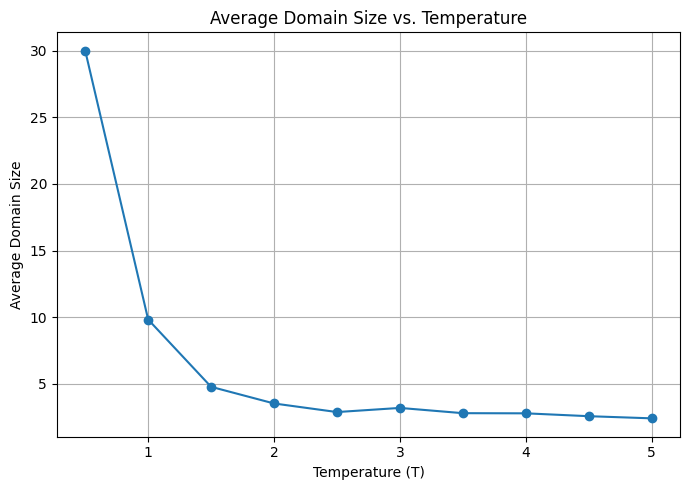

In [3]:
# Loop over multiple temperatures and plot average domain size vs. temperature
import matplotlib.pyplot as plt

# List of temperatures to try (adjustable)
temperatures = np.linspace(0.5, 5.0, 10)
avg_sizes = []

# Only show visual for the first temperature
for i, T in enumerate(temperatures):
    print(f"Running T = {T:.2f}")
    summary = batch_stats_with_visual_once(
        T=T,
        y_offset=2 if i == 0 else 0,
        color_label=color.cyan if i == 0 else color.white
    )
    avg_sizes.append(summary["avg_size"])

# Plotting
plt.figure(figsize=(7, 5))
plt.plot(temperatures, avg_sizes, marker='o', linestyle='-')
plt.xlabel("Temperature (T)")
plt.ylabel("Average Domain Size")
plt.title("Average Domain Size vs. Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()